In [9]:
## Data Manipulation
import pandas as pd
import numpy as np

## Plotting
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def hide_spines(ax, positions=['top', 'right']):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    args:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), 'Position must be passed as a list '
    
    for position in positions:
        ax.spines[position].set_visible(False)

In [3]:
df_emissions = pd.read_pickle('data/emissions.pkl')
df_consumption = pd.read_pickle('data/consumption.pkl')

df_emissions.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,53.125,58.133333,57.733333,47.975,35.750,29.075,26.925,32.675,27.050,28.425,...,36.700,35.075,37.725,46.750,39.50,32.45,25.800,31.625,26.725,22.750
2015-01-02,20.075,17.633333,14.233333,15.625,14.425,9.650,10.700,18.925,33.600,37.075,...,35.050,37.550,50.825,59.375,61.10,69.90,59.475,56.900,51.075,44.800
2015-01-03,42.725,43.166667,39.000000,32.075,32.625,34.575,48.275,40.325,50.300,50.000,...,37.375,46.600,31.375,42.575,47.45,40.05,33.675,52.075,43.600,35.375
2015-01-04,31.725,32.966667,33.933333,28.450,32.875,34.775,33.350,32.225,40.350,38.625,...,61.275,61.200,62.525,66.275,74.55,69.55,80.200,58.375,60.475,59.400
2015-01-05,47.250,40.766667,41.966667,40.825,45.500,54.725,70.150,77.275,84.475,74.625,...,71.350,63.250,58.325,69.350,64.25,48.55,54.300,47.750,44.075,37.025


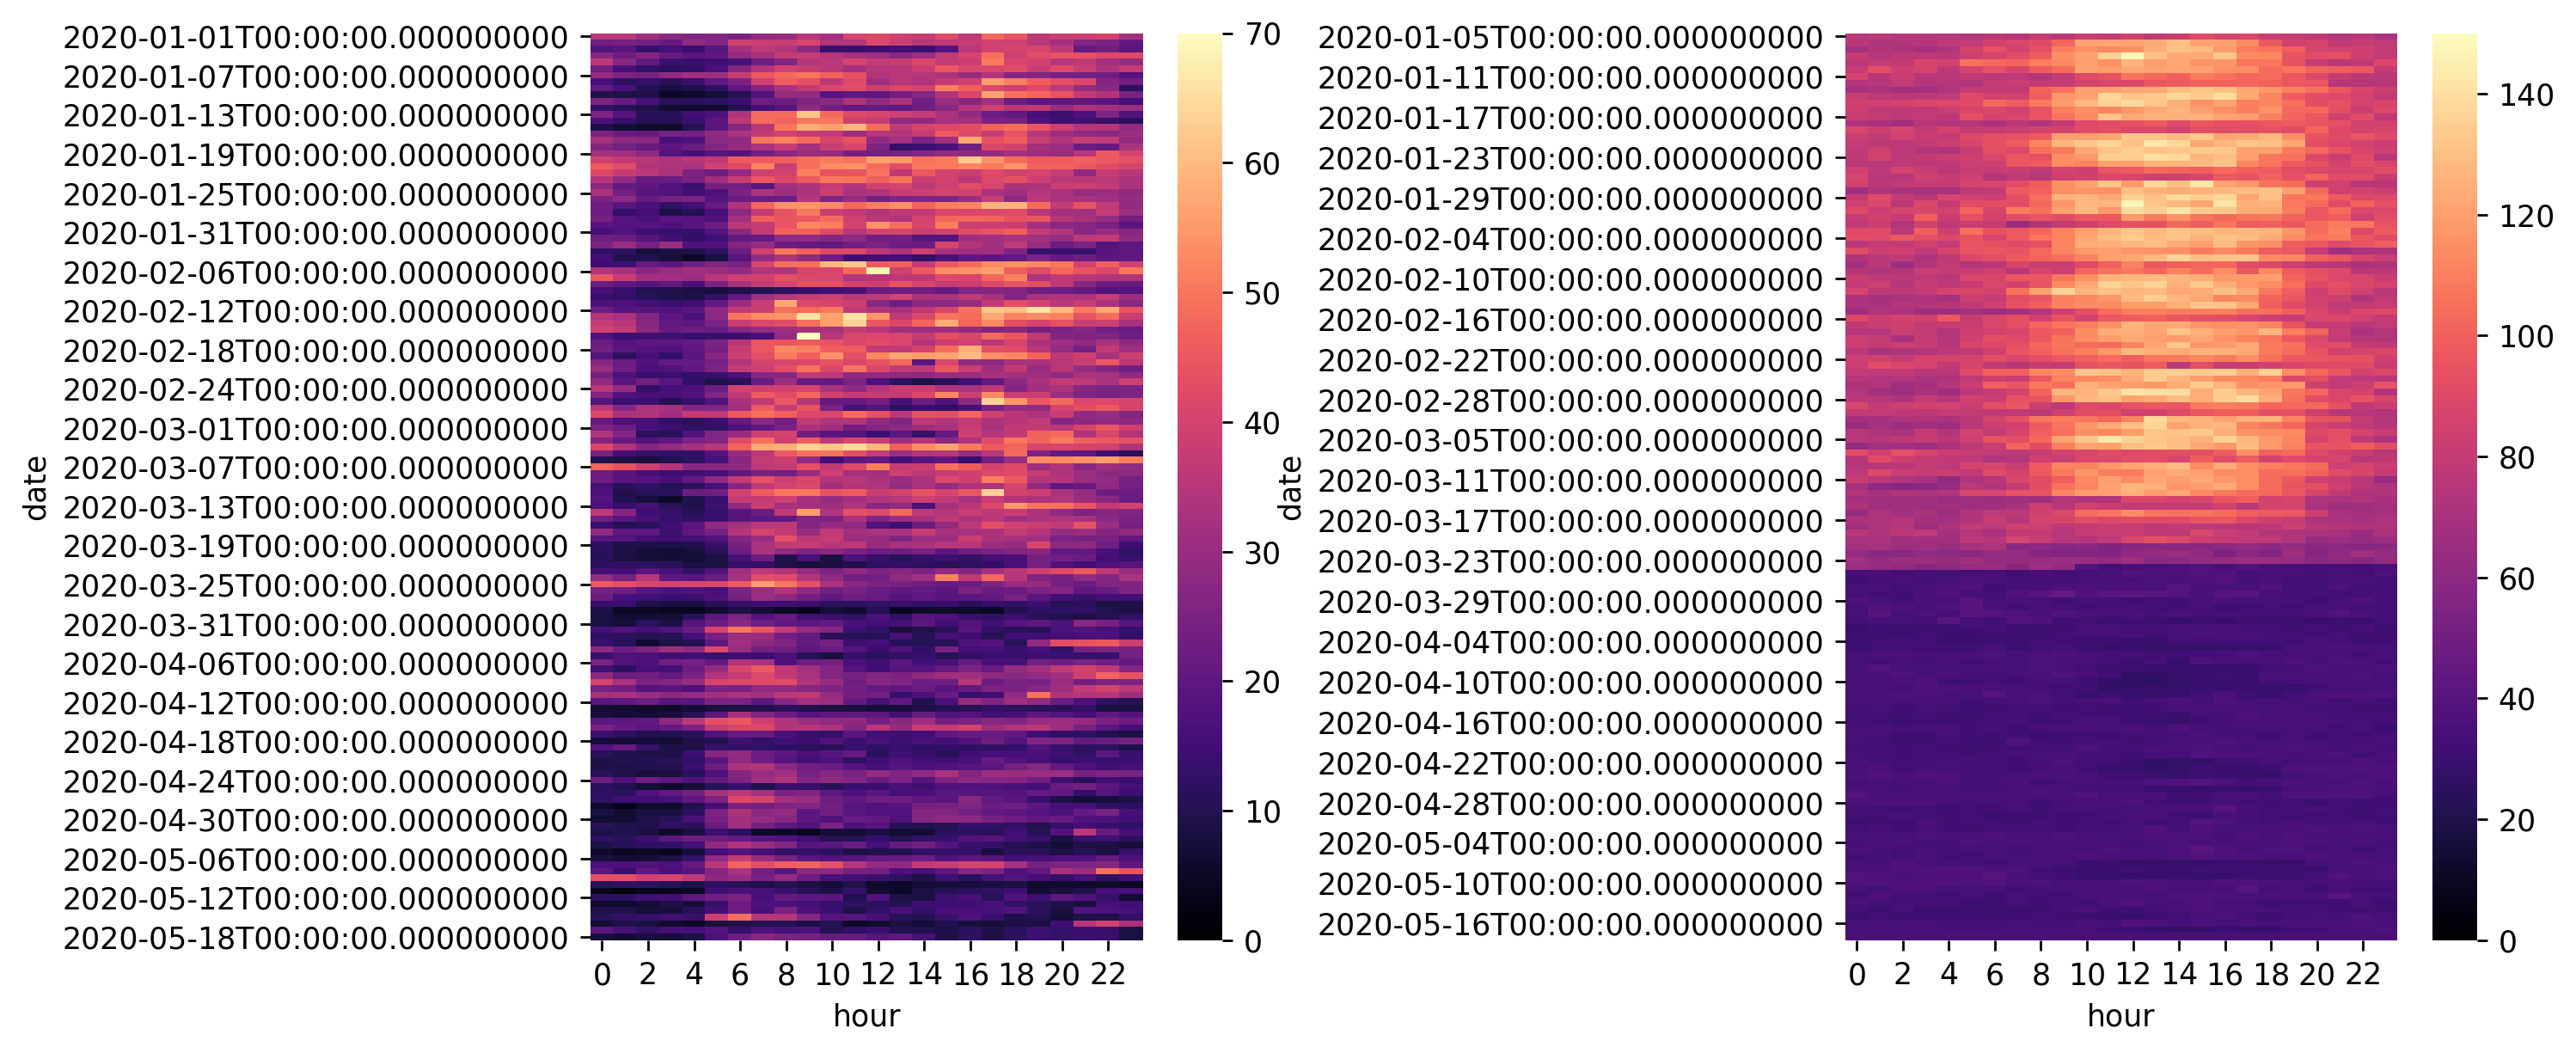

In [4]:
vis_start_date = '2020-01-01'

## Plotting
fig, axs = plt.subplots(dpi=250, ncols=2, figsize=(12, 5))

sns.heatmap(df_emissions[vis_start_date:], ax=axs[0], vmin=0, vmax=70, cmap='magma')
sns.heatmap(df_consumption[vis_start_date:], ax=axs[1], vmin=0, vmax=150, cmap='magma')

fig.tight_layout()

In [5]:
def get_ax_ytick_idx_n_labels(ax):
    ## Accessing y tick labels and positions
    ytick_idx = ax.get_yticks()
    ytick_dt_label = pd.to_datetime([label.get_text() for label in list(ax.get_yticklabels())])

    ## Determining the label spacing
    y_timedeltas = list(set(ytick_dt_label[1:] - ytick_dt_label[:-1]))
    assert len(y_timedeltas) == 1, 'ticks are not equally spaced'
    y_timedelta = y_timedeltas[0]

    ## Determining the position spacing
    y_idx_deltas = list(set(ytick_idx[1:] - ytick_idx[:-1]))
    assert len(y_idx_deltas) == 1, 'ticks are not equally spaced'
    y_idx_delta = y_idx_deltas[0]
    
    return y_timedelta, y_idx_delta

y_timedelta, y_idx_delta = get_ax_ytick_idx_n_labels(axs[0])

print(f'Label spacing: {y_timedelta}\nPosition spacing: {y_idx_delta}')

Label spacing: 6 days 00:00:00
Position spacing: 6.0


<br>

We can see that each date represents an increment in position equal to the number of days, this makes it easier to re-label them with cleaner text

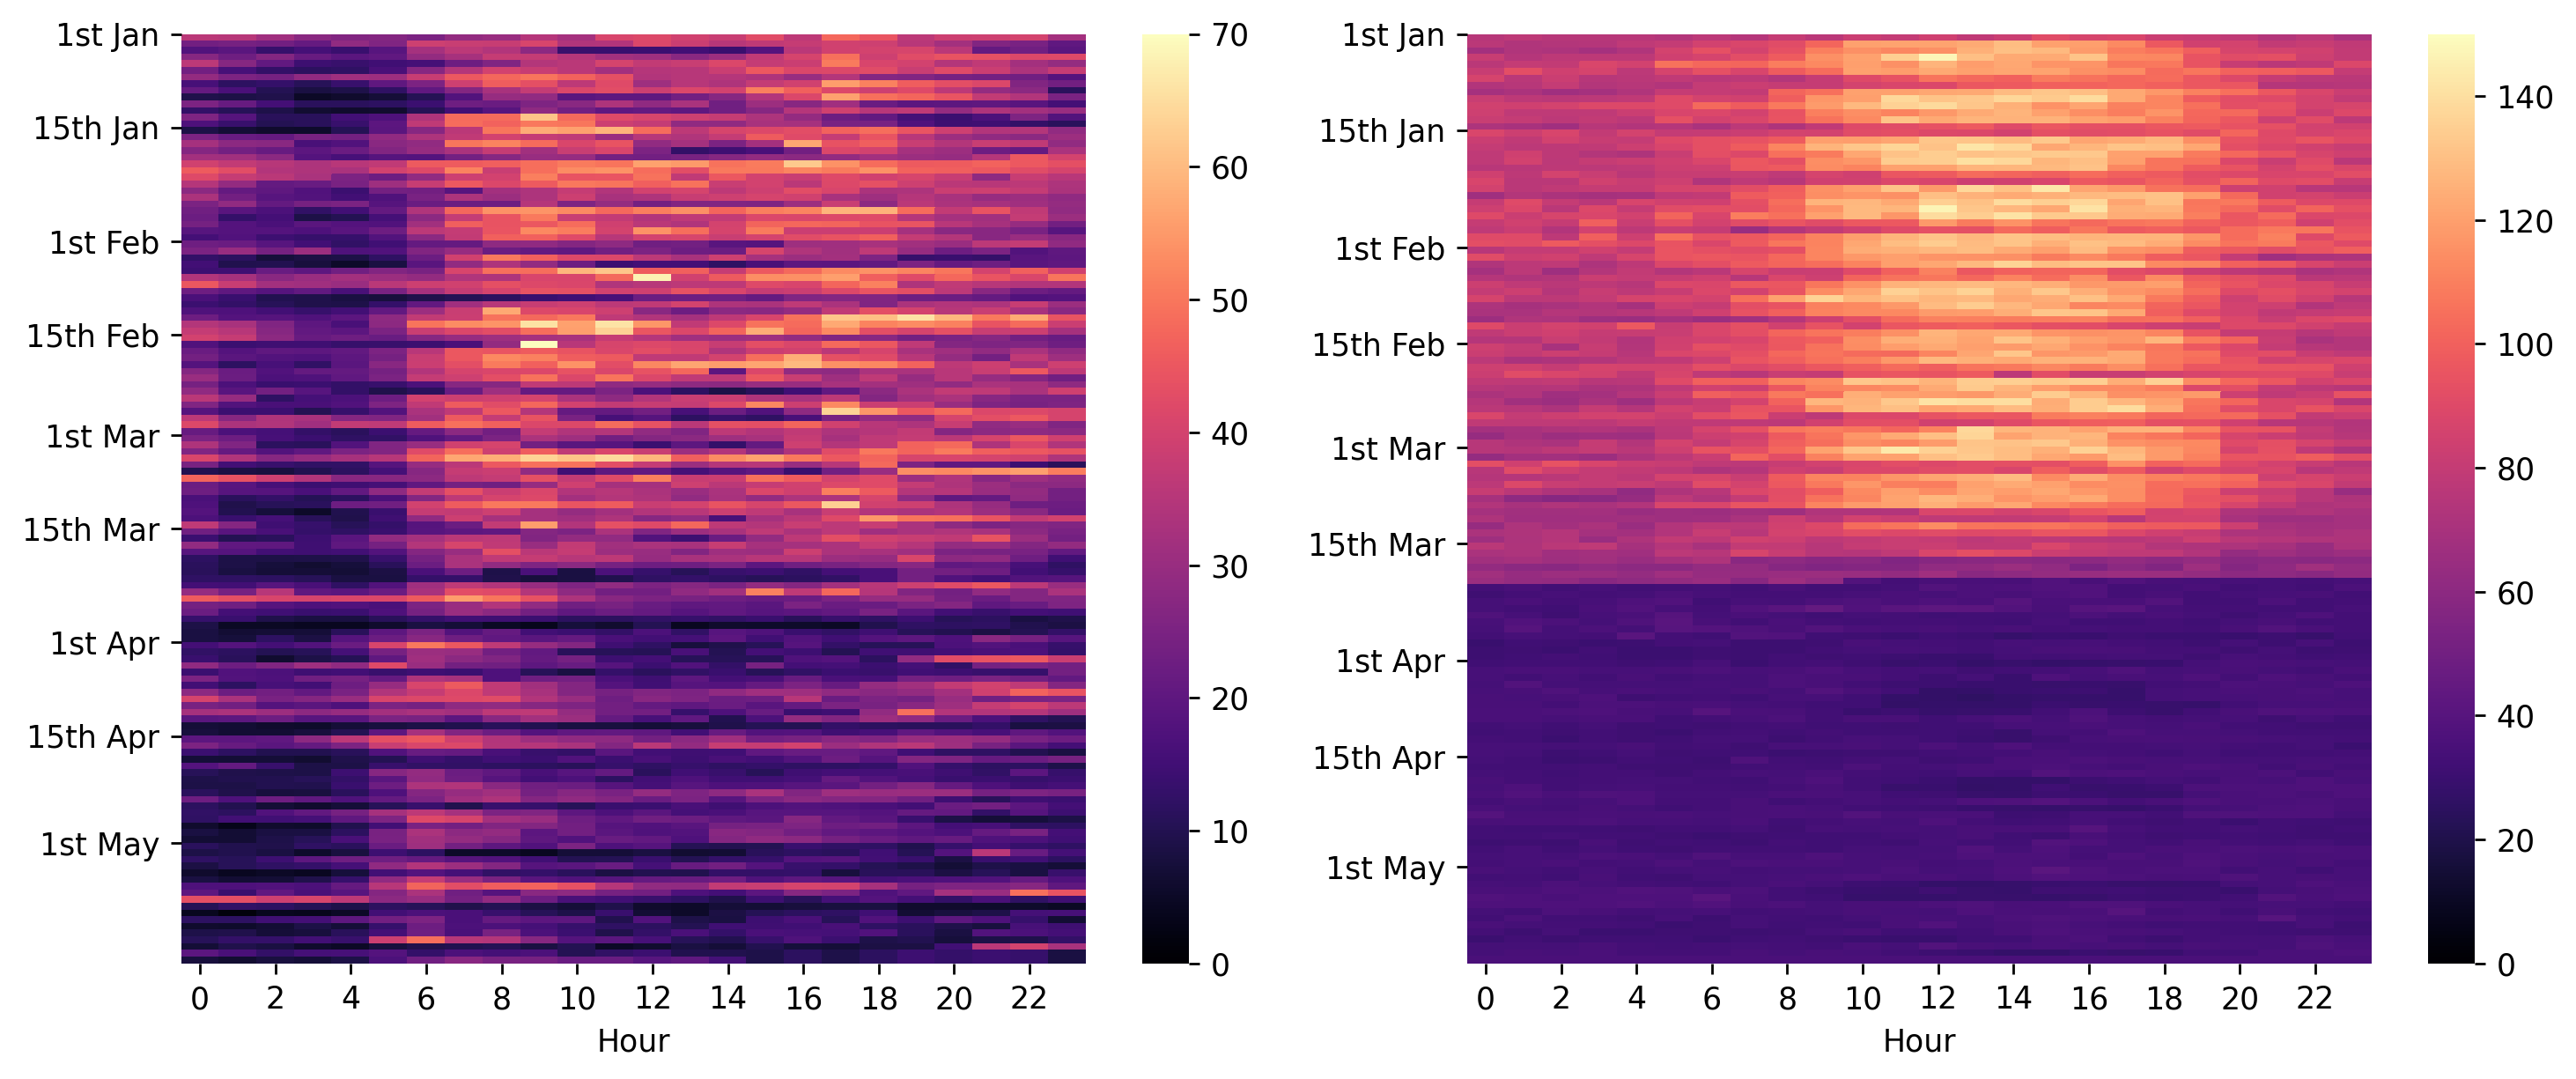

In [14]:
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st', 2:'nd', 3:'rd'}.get(d%10, 'th')

def custom_strftime(format, t):
    return t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))

def get_new_ytick_idx_n_labels(vis_start_date):
    new_y_labels = sorted(pd.date_range(vis_start_date, '2020-05-16', freq='MS')
                           .append(pd.date_range(vis_start_date, '2020-05-16', freq='MS')+
                                   pd.Timedelta(days=14))
                           [:-1]
                          )

    new_y_idx = [(new_y_label-pd.to_datetime(vis_start_date)).days for new_y_label in new_y_labels]
    new_y_labels = [custom_strftime('{S} %b', new_y_label) for new_y_label in new_y_labels]
    
    return new_y_idx, new_y_labels

new_y_idx, new_y_labels = get_new_ytick_idx_n_labels(vis_start_date)

## Plotting
fig, axs = plt.subplots(dpi=250, ncols=2, figsize=(12, 5))

sns.heatmap(df_emissions[vis_start_date:], ax=axs[0], vmin=0, vmax=70, cmap='magma')
sns.heatmap(df_consumption[vis_start_date:], ax=axs[1], vmin=0, vmax=150, cmap='magma')

for ax in axs:
    ax.set_xlabel('Hour')
    ax.set_ylabel('')
    ax.set_title('')
    ax.set_yticks(new_y_idx)
    ax.set_yticklabels(new_y_labels)

fig.tight_layout()

In [15]:
def get_ax_xtick_idx_n_labels(ax):
    ## Accessing x tick labels and positions
    xtick_idx = ax.get_xticks()
    xtick_dt_label = np.array([label.get_text() for label in list(ax.get_xticklabels())]).astype(float)

    ## Determining the label spacing
    x_timedeltas = list(set(xtick_dt_label[1:] - xtick_dt_label[:-1]))
    assert len(x_timedeltas) == 1, 'ticks are not equally spaced'
    x_timedelta = x_timedeltas[0]

    ## Determining the position spacing
    x_idx_deltas = list(set(xtick_idx[1:] - xtick_idx[:-1]))
    assert len(x_idx_deltas) == 1, 'ticks are not equally spaced'
    x_idx_delta = x_idx_deltas[0]
    
    return x_timedelta, x_idx_delta

x_timedelta, x_idx_delta = get_ax_xtick_idx_n_labels(ax)

print(f'Label spacing: {x_timedelta}\nPosition spacing: {x_idx_delta}')

Label spacing: 2.0
Position spacing: 2.0


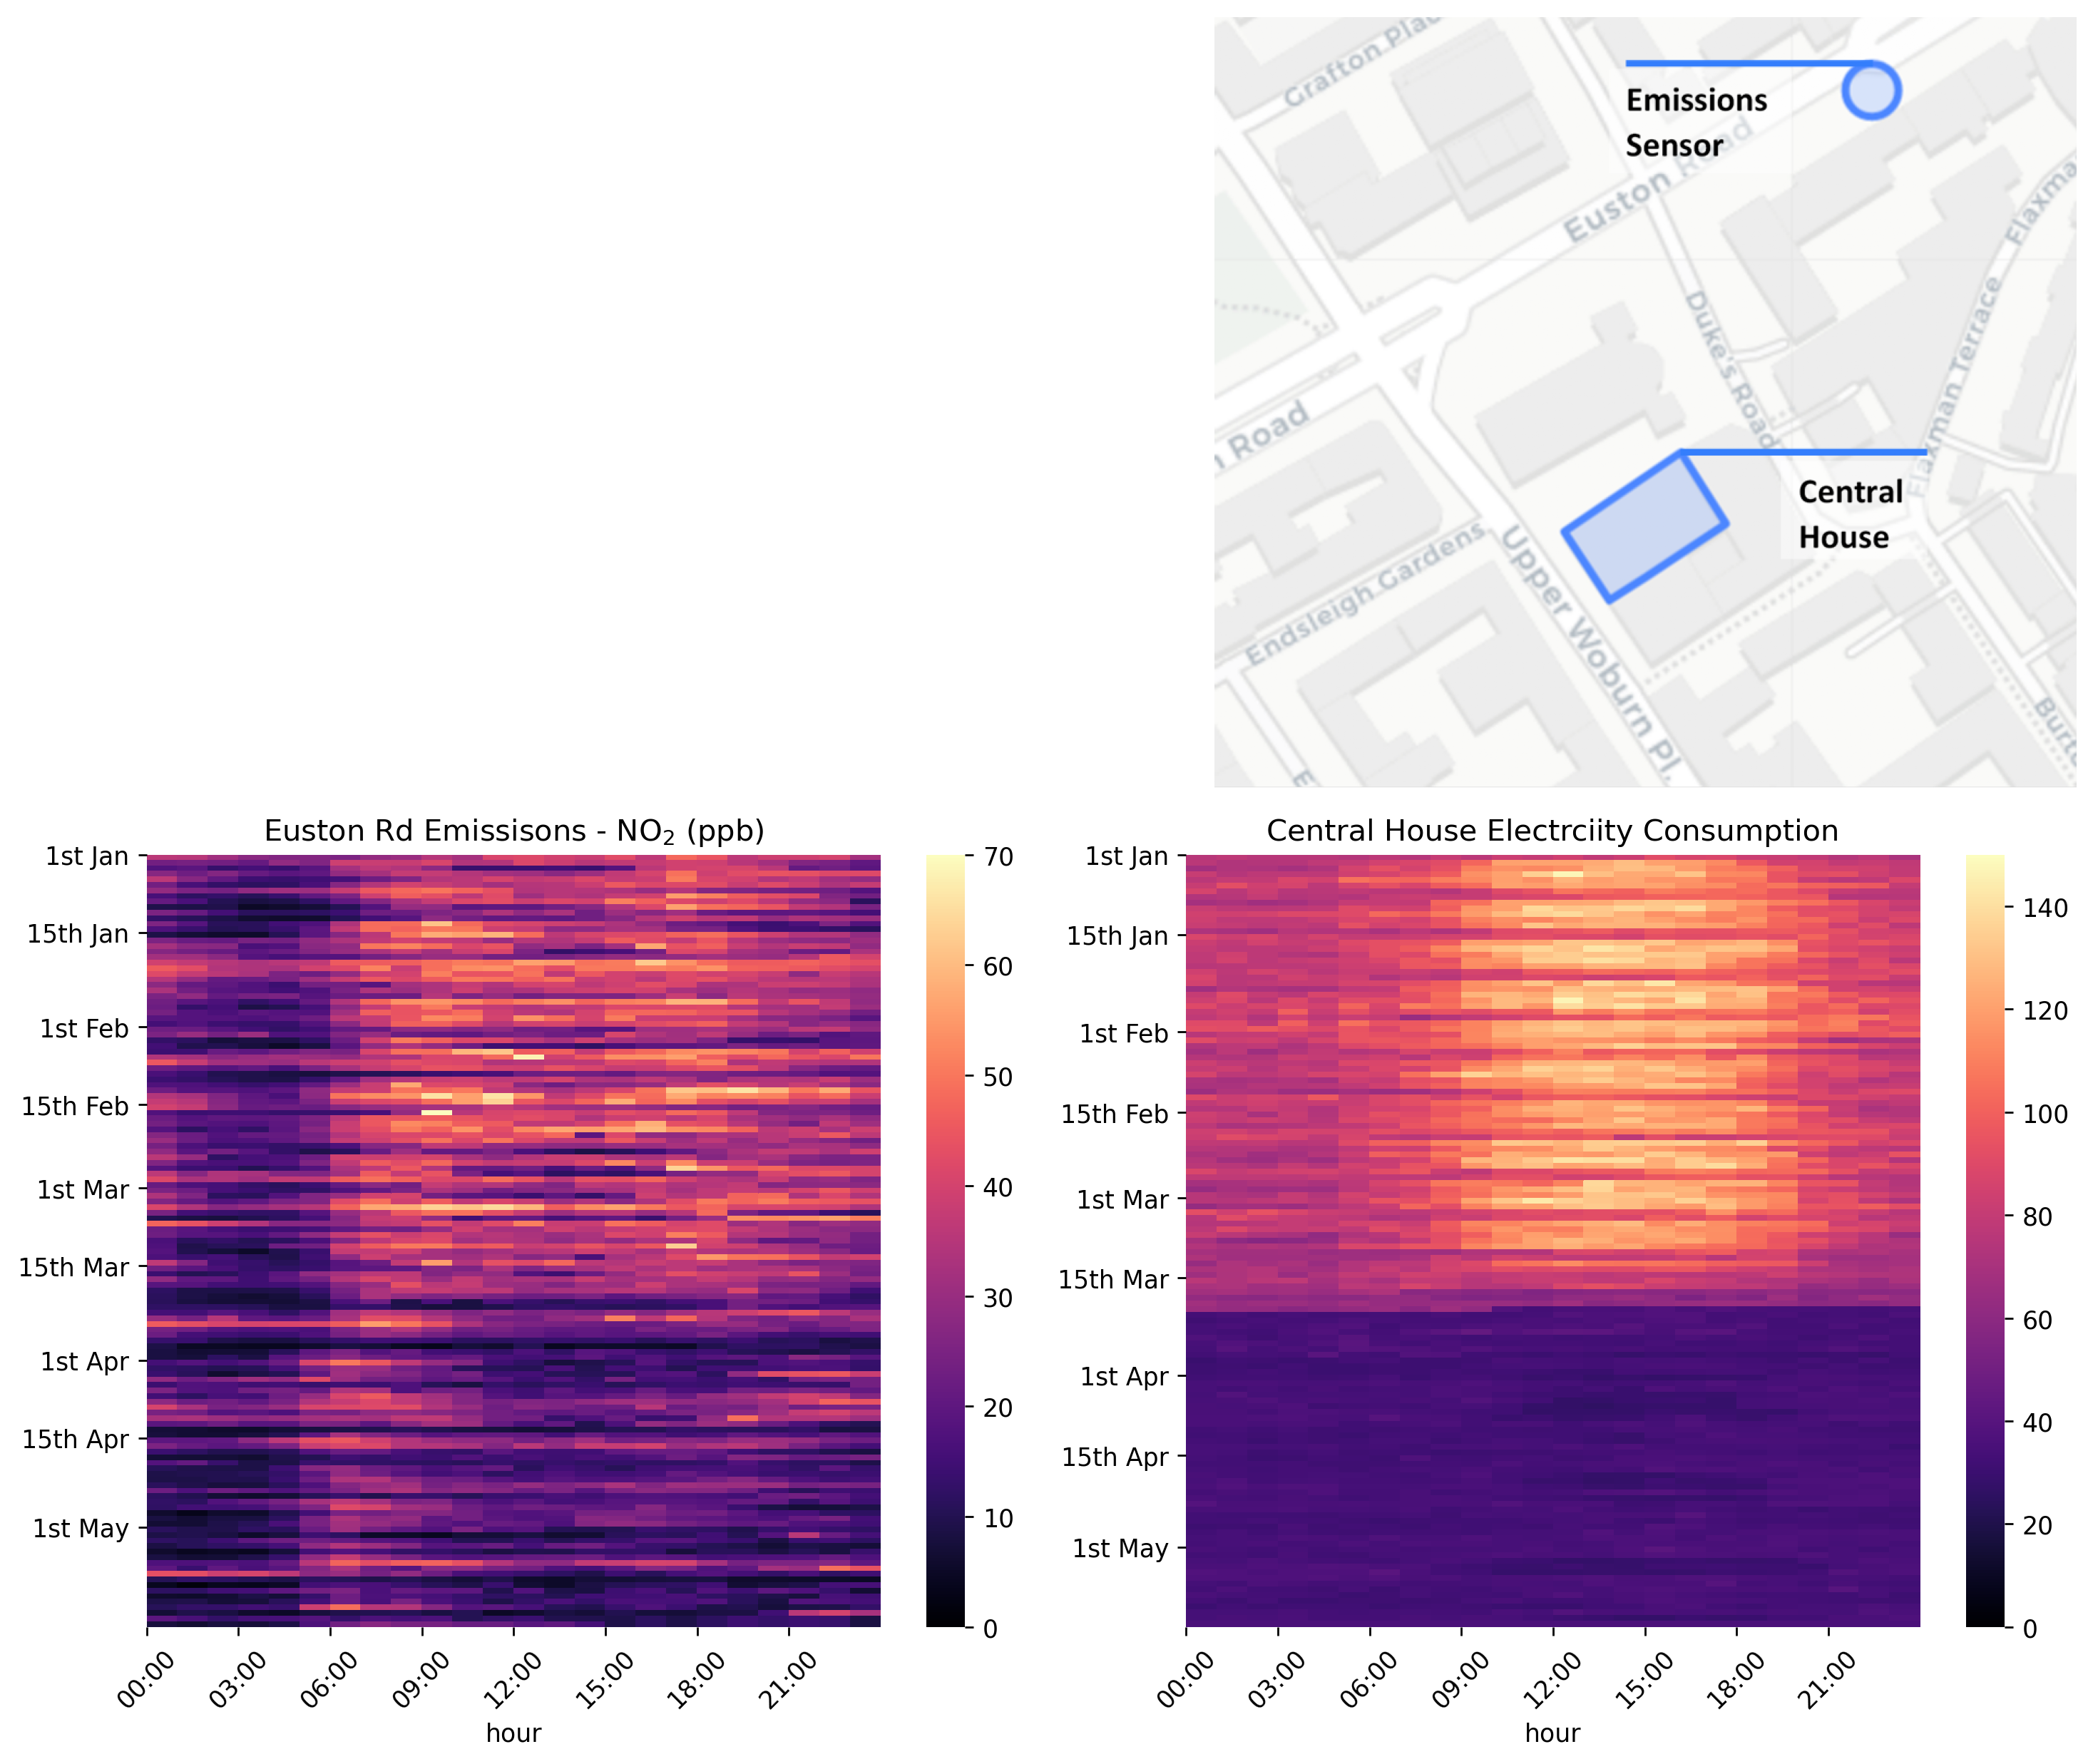

In [16]:
def get_new_xtick_idx_n_labels():
    new_x_idx = list(range(0, 24, 3))
    new_x_labels = [f'{str(hour).zfill(2)}:00' for hour in new_x_idx]
    
    return new_x_idx, new_x_labels

new_x_idx, new_x_labels = get_new_xtick_idx_n_labels()

## Plotting
fig, axs = plt.subplots(dpi=250, ncols=2, nrows=2, figsize=(12, 10))
axs = axs.flatten()

img = mpimg.imread('img/map.png')
axs[1].imshow(img)

sns.heatmap(df_emissions[vis_start_date:], ax=axs[2], vmin=0, vmax=70, cmap='magma')
sns.heatmap(df_consumption[vis_start_date:], ax=axs[3], vmin=0, vmax=150, cmap='magma')

for ax_idx, ax in enumerate(axs):
    ax.set_ylabel('')
    ax.set_title('')
    
    if ax_idx > 1:
        ax.set_xticks(new_x_idx)
        ax.set_xticklabels(new_x_labels, rotation=45)
        ax.set_yticks(new_y_idx)
        ax.set_yticklabels(new_y_labels)
        
    else:
        hide_spines(ax, positions=['top', 'bottom', 'left', 'right'])
        ax.set_xticks([])
        ax.set_yticks([])
        
axs[2].set_title('Euston Rd Emissisons - NO$_{2}$ (ppb)')
axs[3].set_title('Central House Electrciity Consumption')

fig.tight_layout()